# NMAtch Module: example notebook
</br>

In this notebook we will see how to apply the NMAtch module to infer the $ATT_k$, $DEF_k$, and $\beta$ from a fixed-time tournament. This example will run with *Serie A 2022/23* downloaded from http://www.football-data.co.uk/

</br>

More details about the method can be found in the following paper: *(the link is a WIP)*

In [1]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

import nmatch as nma

# creating our save folder
SAVE_DIR = "./results/"
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

In [2]:
# loading the dataset
match_df = pd.read_csv("./serie-a_2023.csv")
teams = np.unique(np.concatenate((match_df['HomeTeam'], match_df['AwayTeam'])))
display(match_df.head(10))

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,I1,13/08/2022,17:30,Milan,Udinese,4,2,H,2,2,...,2.16,-1.25,1.98,1.92,2.02,1.91,2.17,1.94,2.06,1.81
1,I1,13/08/2022,17:30,Sampdoria,Atalanta,0,2,A,0,1,...,2.24,0.75,2.07,1.83,2.11,1.82,2.13,1.87,2.06,1.82
2,I1,13/08/2022,19:45,Lecce,Inter,1,2,A,0,1,...,2.55,1.50,1.90,2.00,1.91,2.02,1.96,2.06,1.89,1.97
3,I1,13/08/2022,19:45,Monza,Torino,1,2,A,0,1,...,1.75,0.00,1.79,2.11,1.80,2.15,1.88,2.16,1.83,2.06
4,I1,14/08/2022,17:30,Fiorentina,Cremonese,3,2,H,2,1,...,2.09,-1.00,2.02,1.88,2.06,1.87,2.07,1.97,1.99,1.87
5,I1,14/08/2022,17:30,Lazio,Bologna,2,1,H,0,1,...,2.27,-0.75,1.90,2.00,1.93,2.00,1.93,2.06,1.88,1.99
6,I1,14/08/2022,19:45,Salernitana,Roma,0,1,A,0,1,...,2.10,1.25,1.73,2.08,1.88,2.05,1.90,2.19,1.83,2.04
7,I1,14/08/2022,19:45,Spezia,Empoli,1,0,H,1,0,...,2.06,-0.25,2.13,1.78,2.15,1.81,2.16,1.81,2.11,1.78
8,I1,15/08/2022,17:30,Verona,Napoli,2,5,A,1,2,...,2.12,0.50,1.84,2.06,1.89,2.03,1.90,2.09,1.86,2.01
9,I1,15/08/2022,19:45,Juventus,Sassuolo,3,0,H,2,0,...,2.52,-1.25,1.99,1.91,2.03,1.90,2.07,1.94,1.99,1.87


In the next cell we are going to run the model. It is defined through the **NMAtchModel** class and run using its **runBayes** function. The input parameters of this function are the following:

</br>

- **niters:** the number of samples of the MCMC $ $
- **burn_in:** the number of initial samples of the MCMC that are going to be discarded. They are not included in the niters.
- **chains:** the number of MCMC chains. $ $
- **home_boost:** if $\beta$ needs to be inferred or set to 1.
- **save_path:** where to save the trace (if None it will not be saved) $ $

The total number of samples will be **chains \* (burn_in + niters)** and the total number of saved ones will be **chains \* niters**.

</br>

The parameters we use here are the same used in the paper. In the last cells we generate the result table, the rankograms, the SUCRA table, and the forest plots. They should match exactly the ones included in the paper.

In [4]:
# defining and running the model (takes a few hours!)
model = nma.NMAtchModel(match_df, edgelist_map={'HomeTeam':'HomeTeam', 'AwayTeam':'AwayTeam',
                                                'HomeScore':'FTHG', 'AwayScore':'FTAG'})
trace = model.runBayes(niters=20000, burn_in=10000, chains=4, home_boost=True,
                       save_path=f"{SAVE_DIR}serie-a_2023_trace.pickle")

100%|█████████████████████████████████████████| 380/380 [00:35<00:00, 10.64it/s]


Starting to sample (this will take a while, especially after the prog-bar)...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [home_boost, defenses, attacks]


Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 4174 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Done!

Bayesian sampling is over! [tte = 125.0 mins]


In [3]:
# loading the trace (if don't want to run again) and printing/saving the result table
trace = pickle.load(open(f"{SAVE_DIR}serie-a_2023_trace.pickle", 'rb'))
table = nma.resultTable(trace, teams, show=True, home_boost=True,
                        save_path=f"{SAVE_DIR}serie-a_2023_table.pickle")

,variable,team,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
0,att,Atalanta,0.873,0.083,0.729,1.000,0.000,0.000,30008.0,27723.0,1.0
1,att,Bologna,0.742,0.104,0.547,0.937,0.001,0.000,31068.0,26590.0,1.0
2,att,Cremonese,0.523,0.092,0.355,0.697,0.000,0.000,36177.0,41598.0,1.0
3,att,Empoli,0.524,0.091,0.359,0.695,0.000,0.000,37469.0,41255.0,1.0
4,att,Fiorentina,0.737,0.104,0.551,0.940,0.001,0.000,26950.0,22445.0,1.0
5,att,Inter,0.902,0.072,0.773,1.000,0.000,0.000,30621.0,25405.0,1.0
6,att,Juventus,0.768,0.103,0.585,0.964,0.001,0.000,29402.0,27314.0,1.0
7,att,Lazio,0.812,0.098,0.654,1.000,0.001,0.000,26107.0,22932.0,1.0
8,att,Lecce,0.468,0.085,0.313,0.630,0.000,0.000,40104.0,43433.0,1.0
9,att,Milan,0.855,0.089,0.704,1.000,0.000,0.000,29467.0,25461.0,1.0


In [4]:
# creating a folder for the rankograms
RANKO_DIR = "./results/rankograms/"
if not os.path.exists(RANKO_DIR):
    os.makedirs(RANKO_DIR)

# generating rankograms and the  sucra table
_, sucra_df = nma.rankoTeam(match_df, trace, teams=None, cmap='plasma_r', fontsize=12,
                            edgelist_map={'HomeTeam':'HomeTeam', 'AwayTeam':'AwayTeam',
                                          'HomeScore':'FTHG', 'AwayScore':'FTAG'},
                            save_path=RANKO_DIR, ranko_show=False, sucra_show=True)

100%|█████████████████████████████████████████████████████████| 80000/80000 [22:24<00:00, 59.52it/s]


,treatment,sucra
0,Atalanta,0.706545
1,Bologna,0.573699
2,Cremonese,0.164345
3,Empoli,0.351076
4,Fiorentina,0.646959
5,Inter,0.78543
6,Juventus,0.776823
7,Lazio,0.819292
8,Lecce,0.321316
9,Milan,0.743166


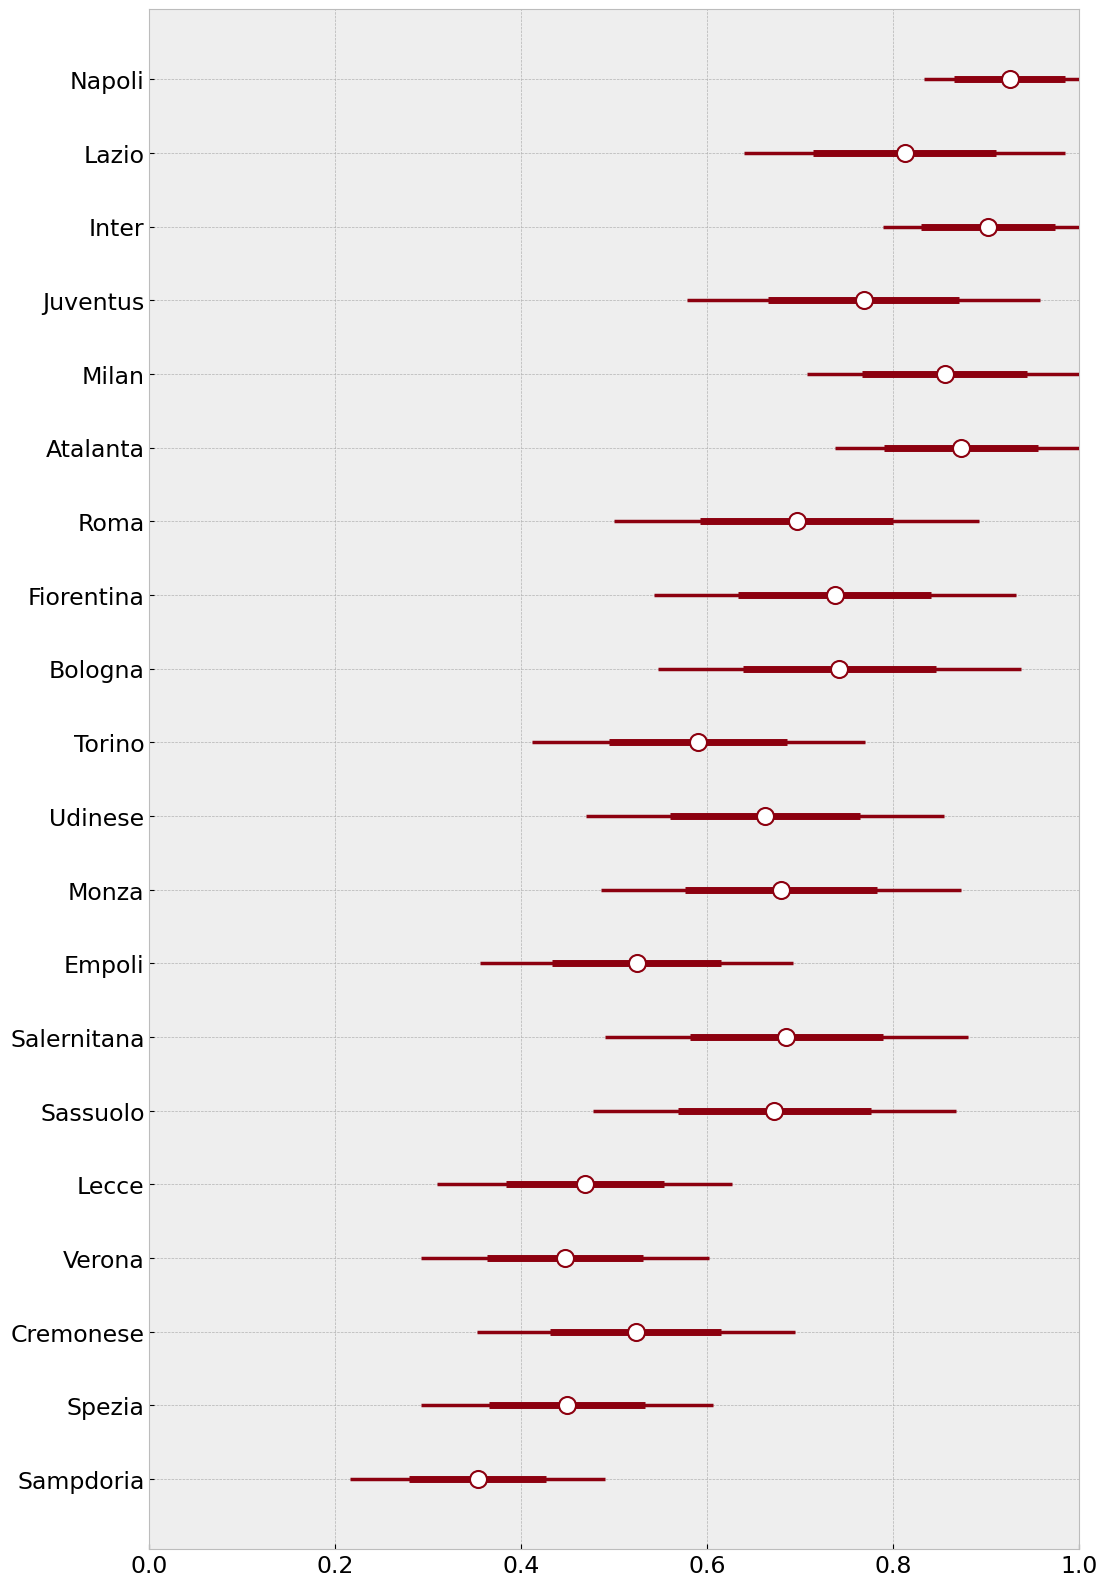

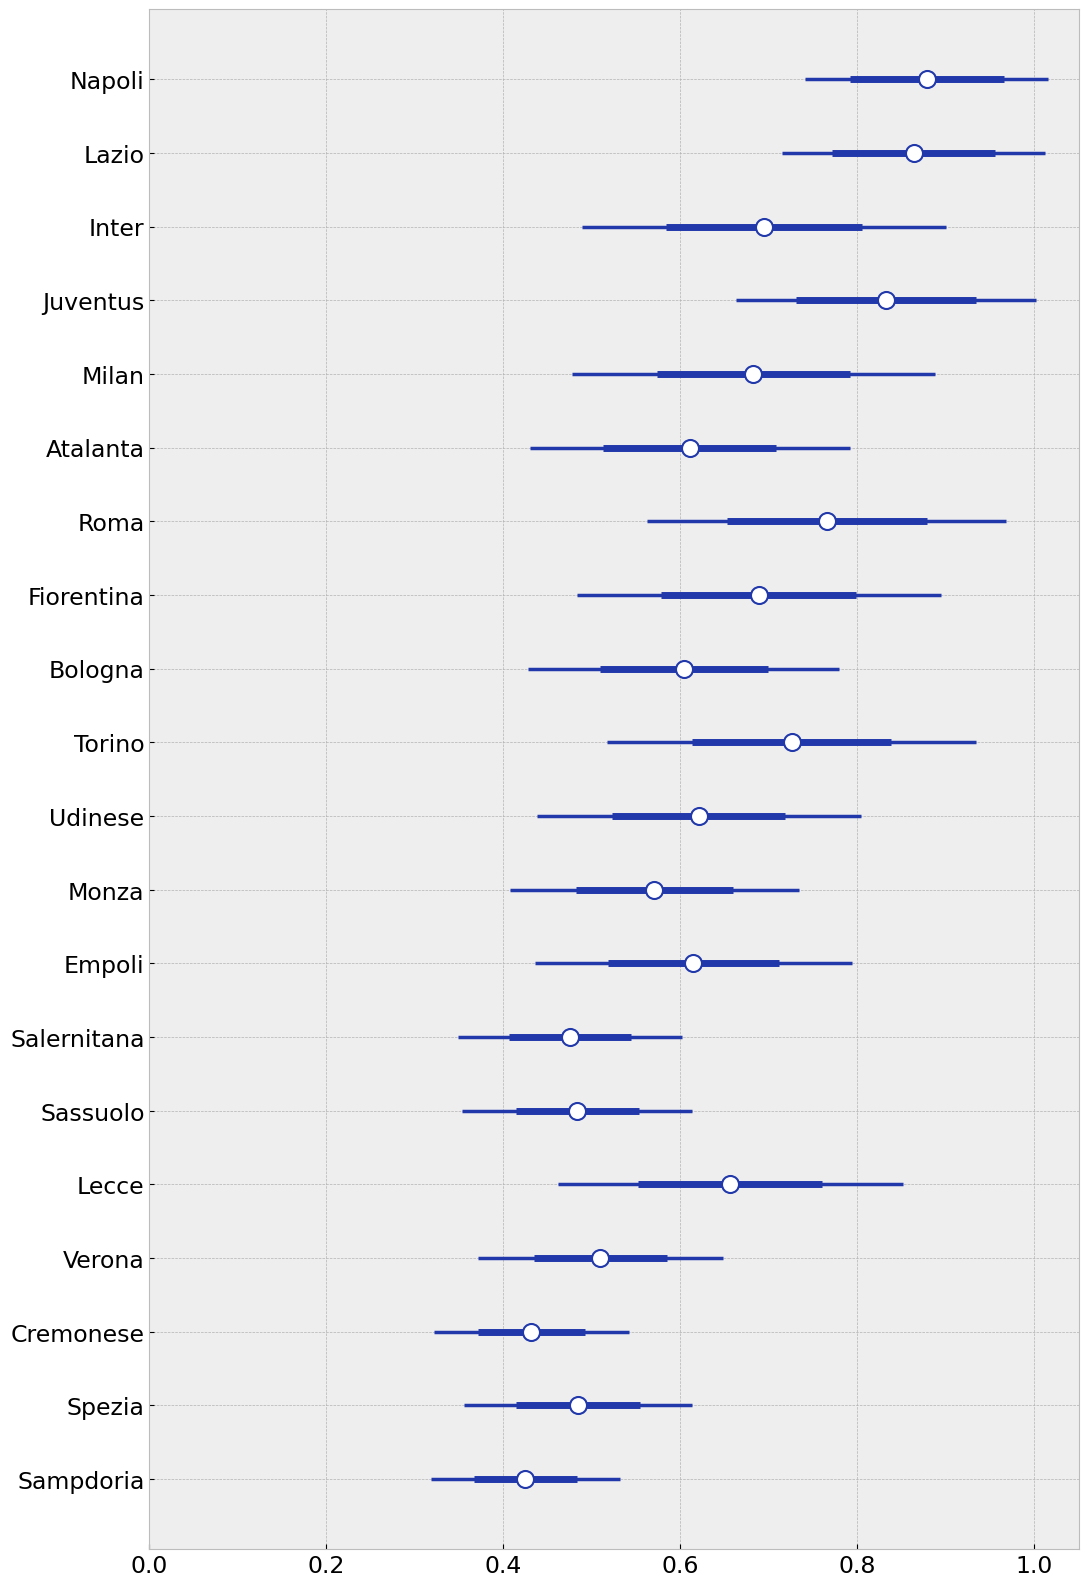

In [7]:
# redefining rankograms folder and loading sucra table if don't want to run again
RANKO_DIR = "./results/rankograms/"
sucra_df = pd.read_csv(f"{RANKO_DIR}sucra_scores.csv")

# generating forest plots with sucra-based sorting
nma.forestPlot(table, att_color='xkcd:crimson', def_color='xkcd:sapphire', show=True,
               att_save_path=f"{SAVE_DIR}serie-a_2023_forest-att.pdf",
               def_save_path=f"{SAVE_DIR}serie-a_2023_forest-def.pdf",
               xlim=None, sucras=sucra_df, fontsize=17)